In [1]:
import sys

import matplotlib.pyplot as plt

sys.path.append('..')
from antlia import lidar
from antlia import util

%load_ext autoreload
%autoreload 2

In [ ]:
# run cell for interactive plots
import mpld3
mpld3.enable_notebook()

In [2]:
def set_title(ax, title):
    try:
        mpld3
    except NameError:
        ax.figure.suptitle(title)
    else:
        ax.set_title(title)

In [3]:
DEFAULT_FIGSIZE = (14, 7)

In [12]:
records = lidar.load_records(sync=False)

Unable to determine range 2
Unable to determine range 1


/Users/oliver/miniconda3/envs/dev/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


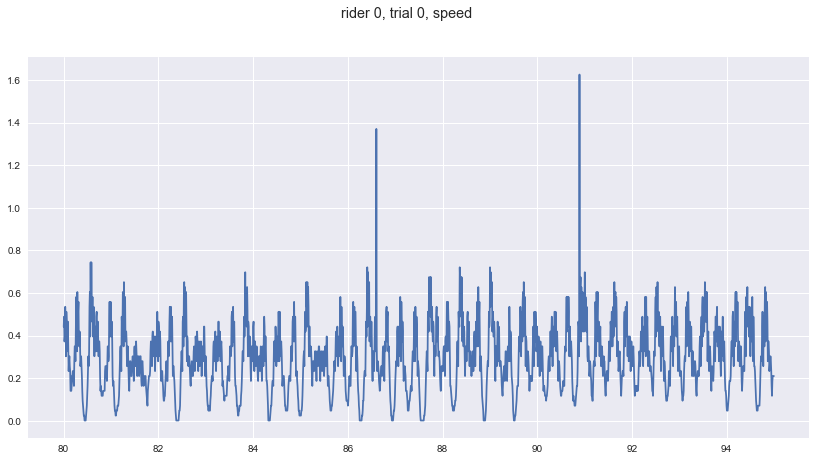

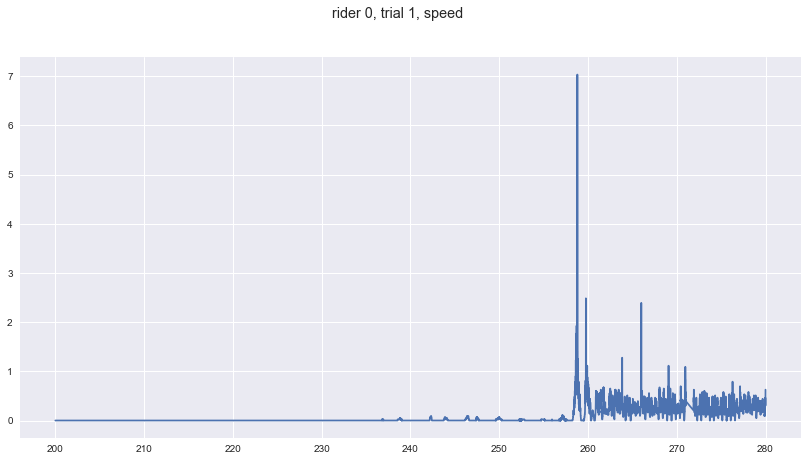

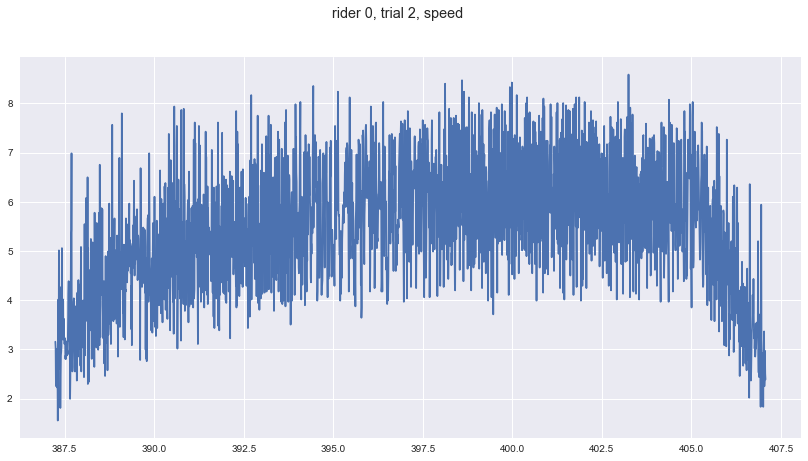

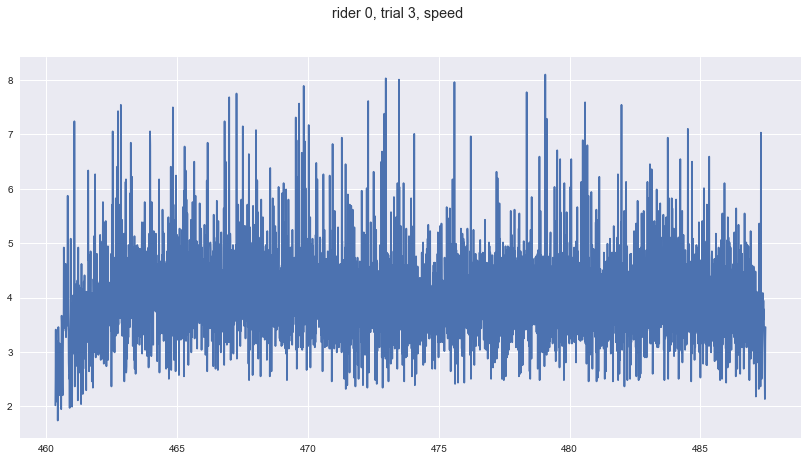

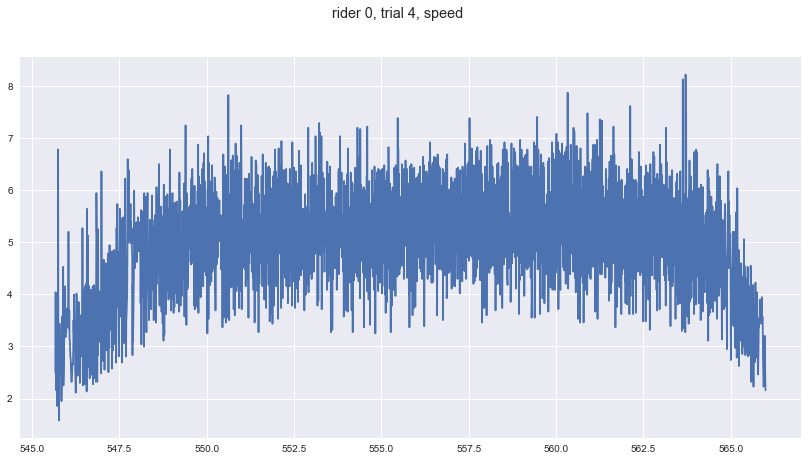

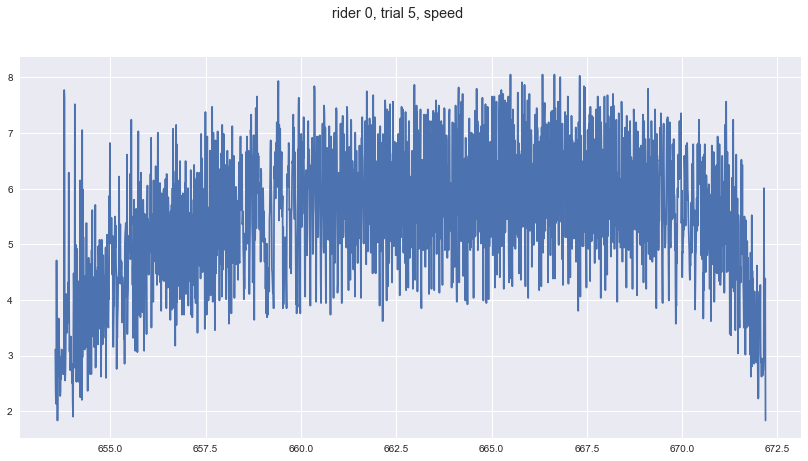

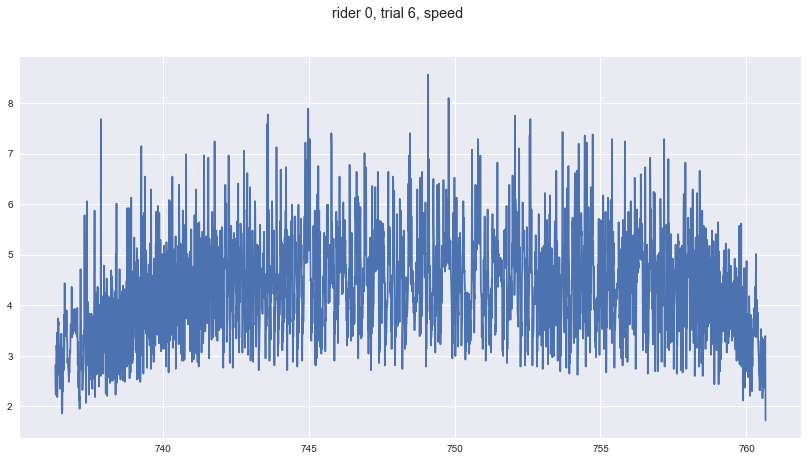

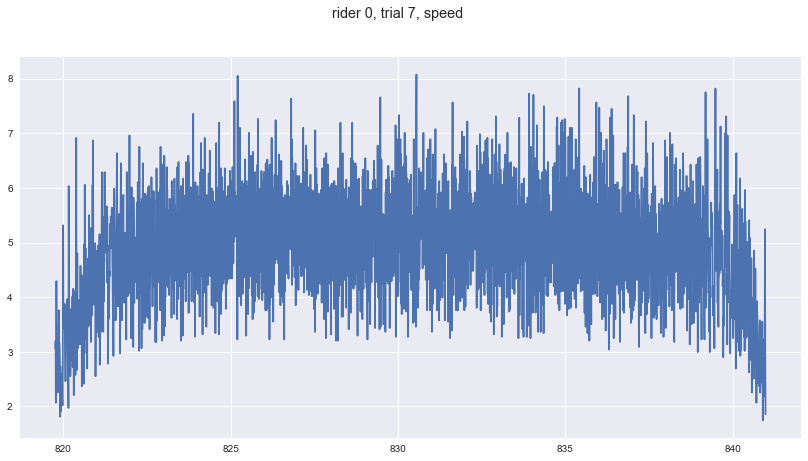

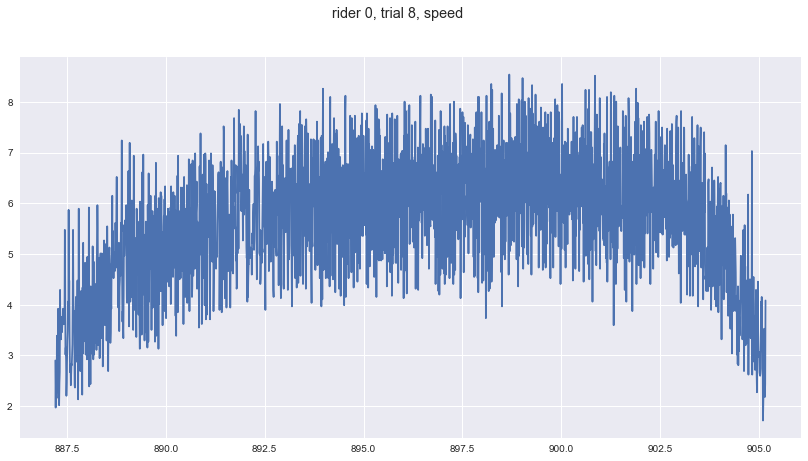

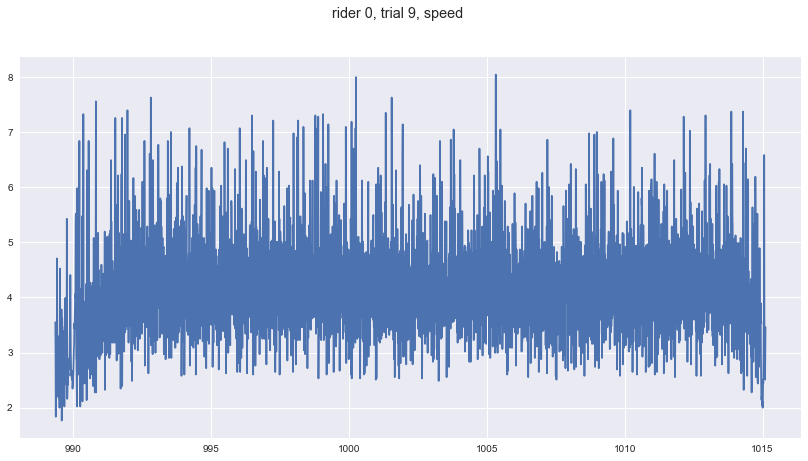

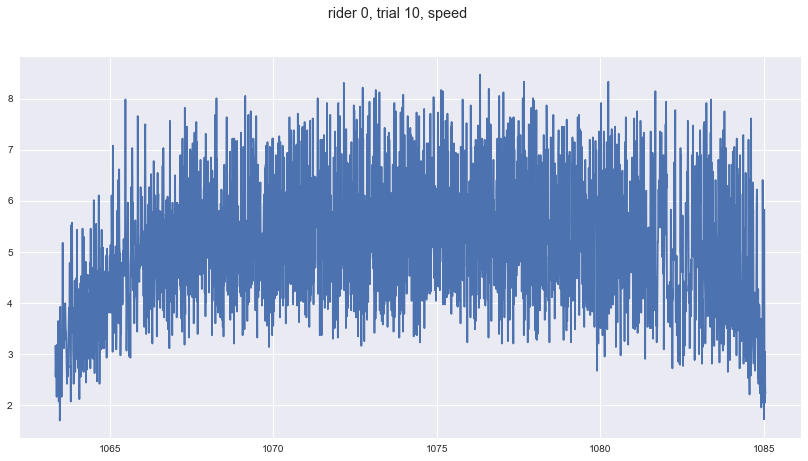

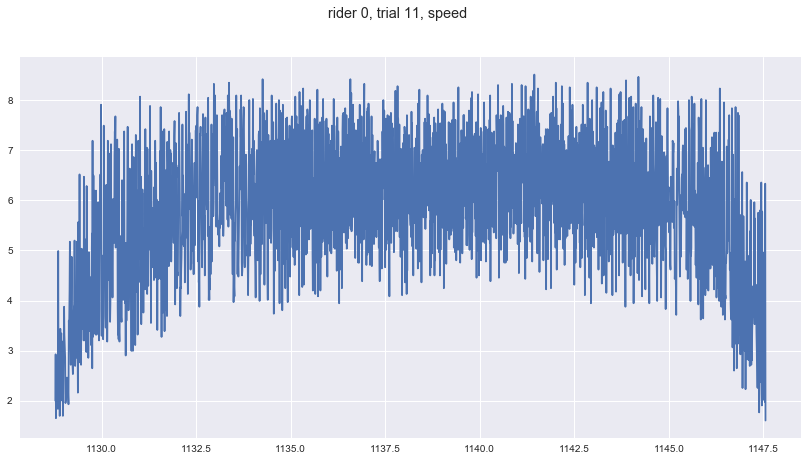

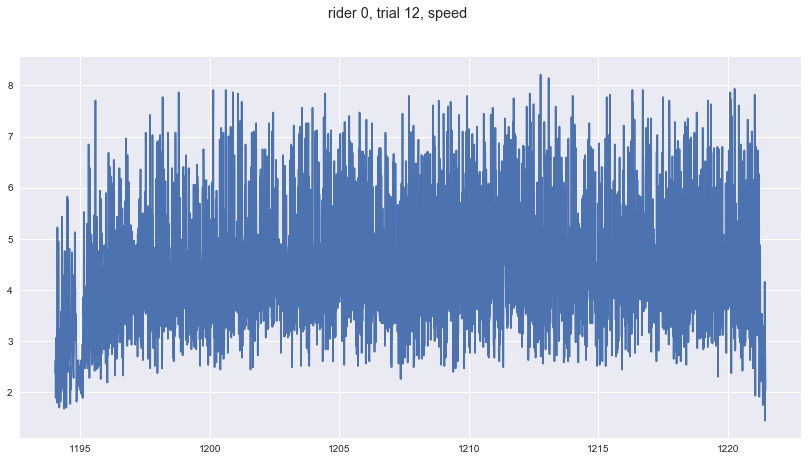

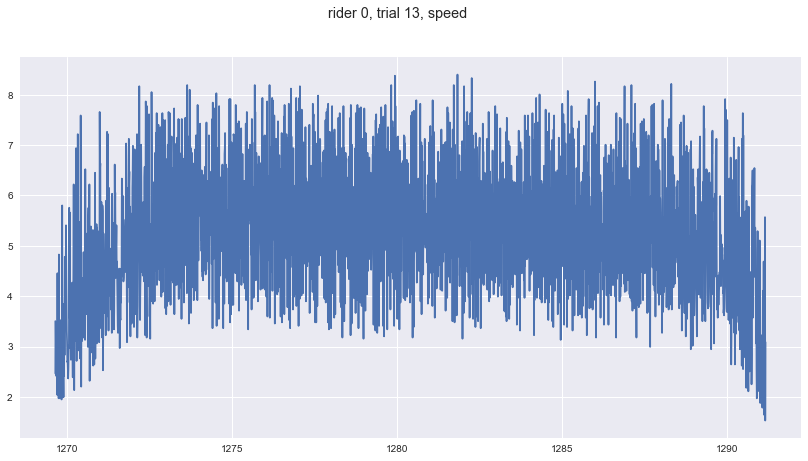

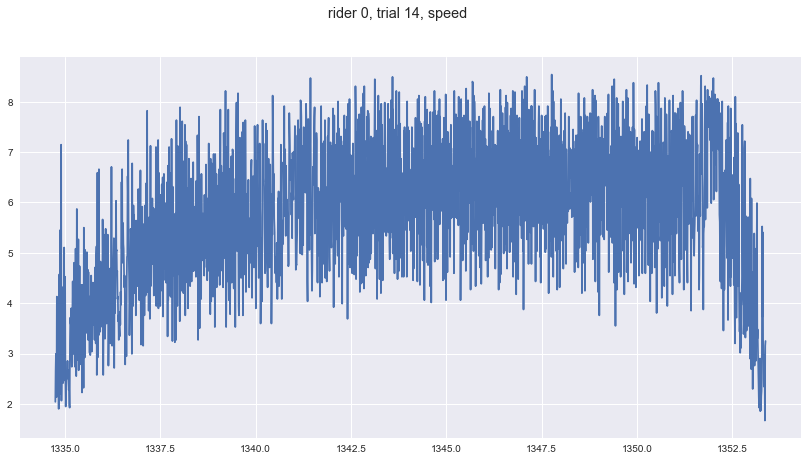

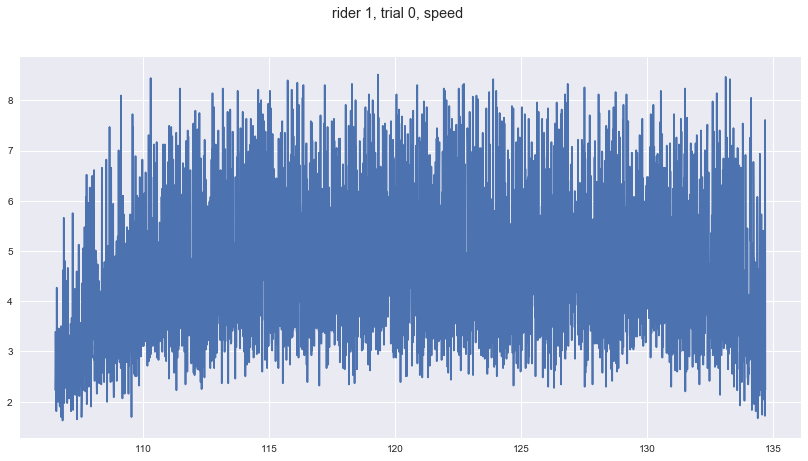

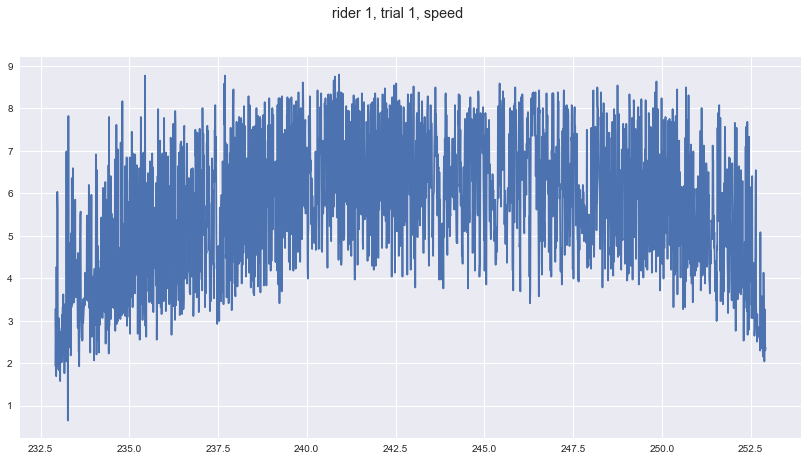

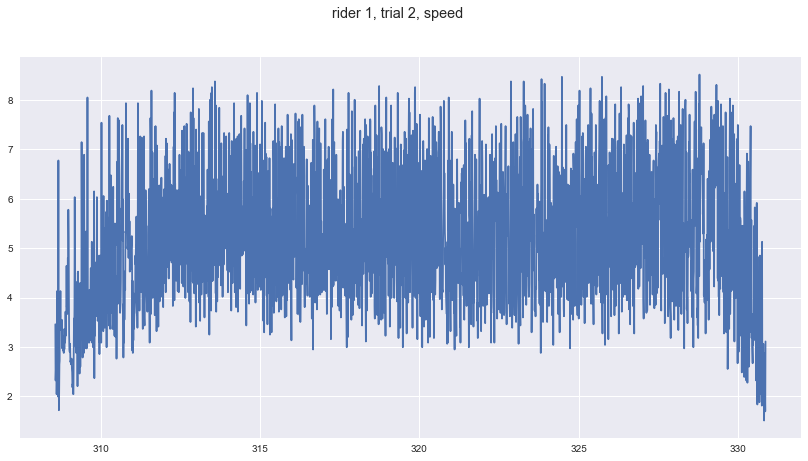

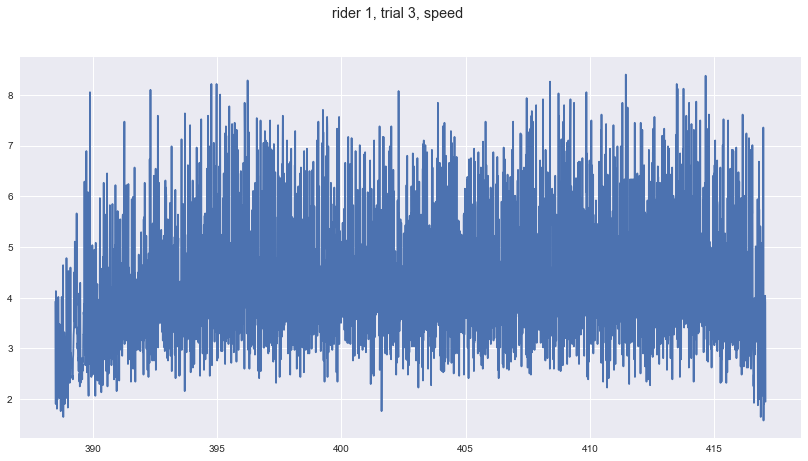

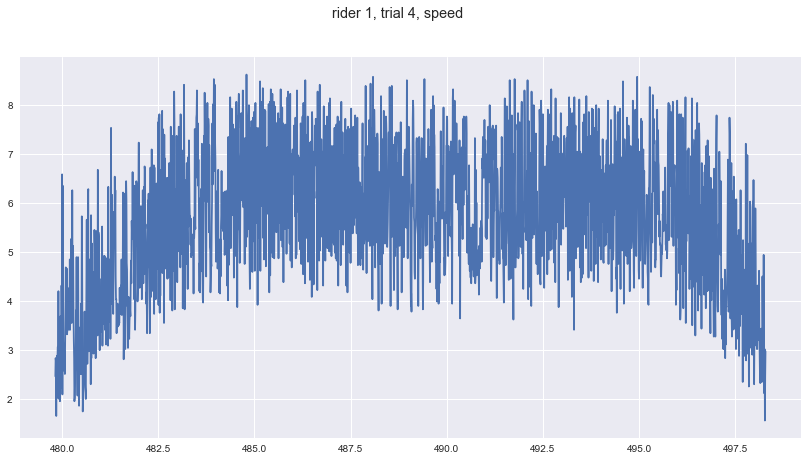

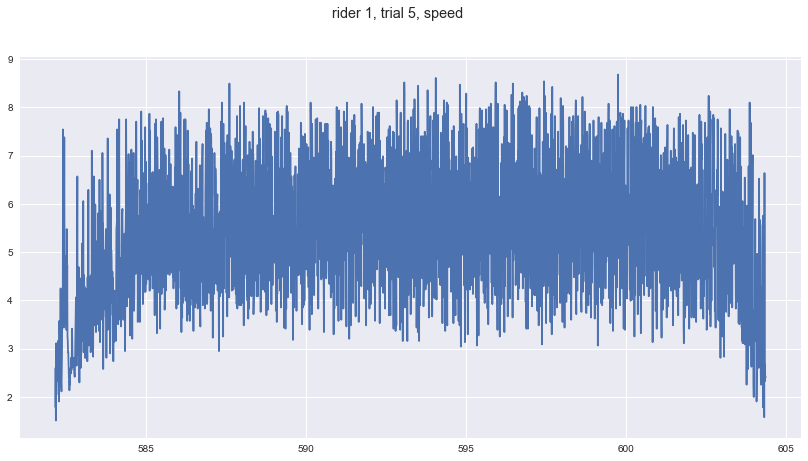

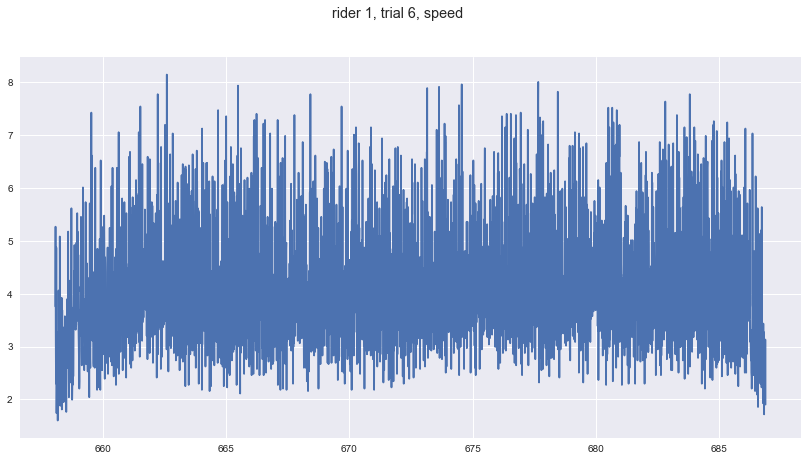

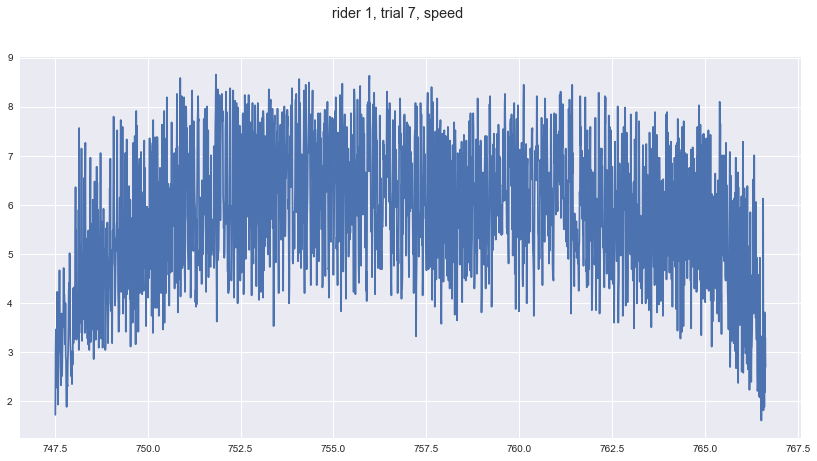

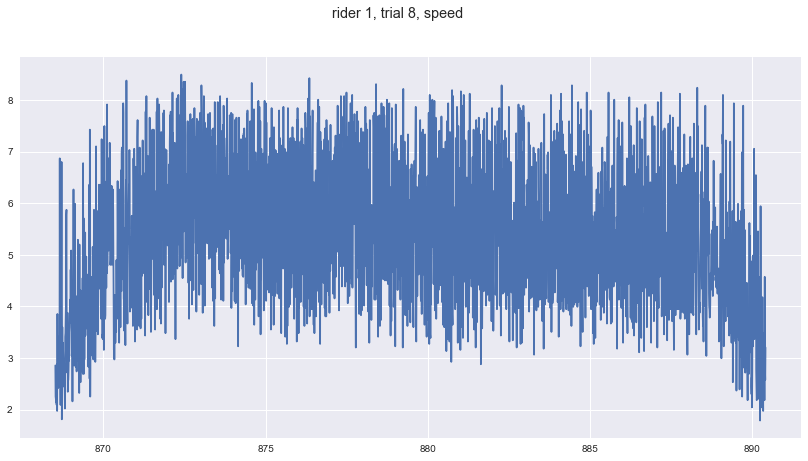

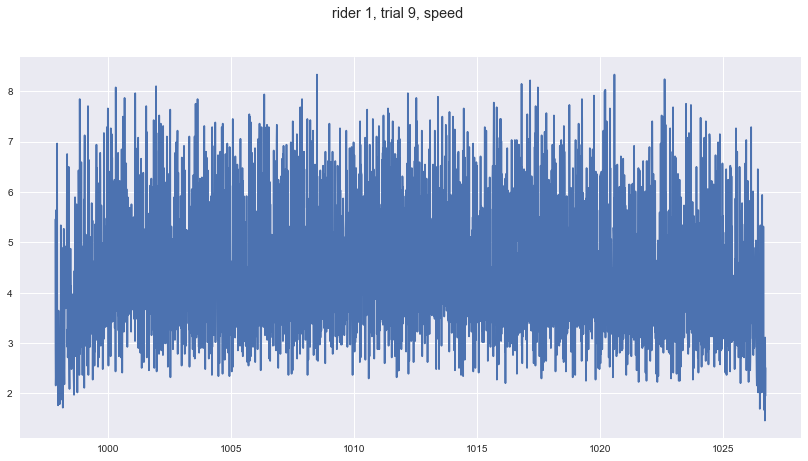

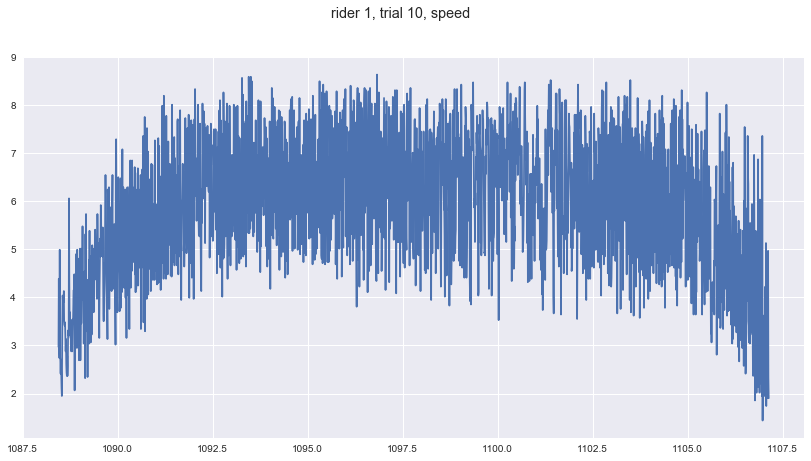

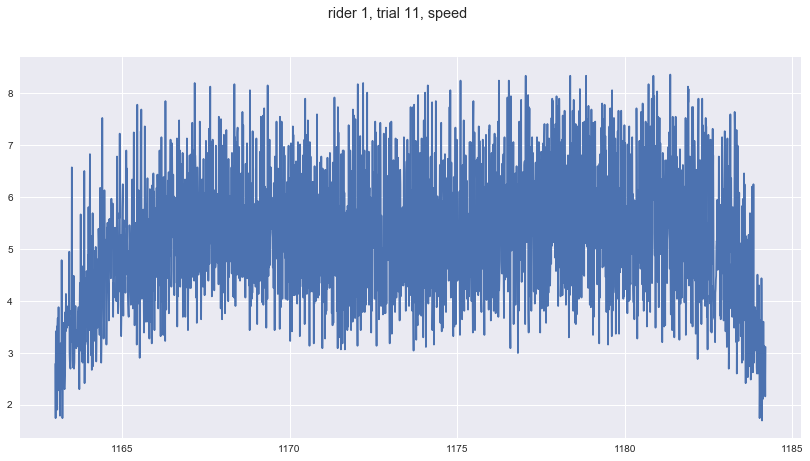

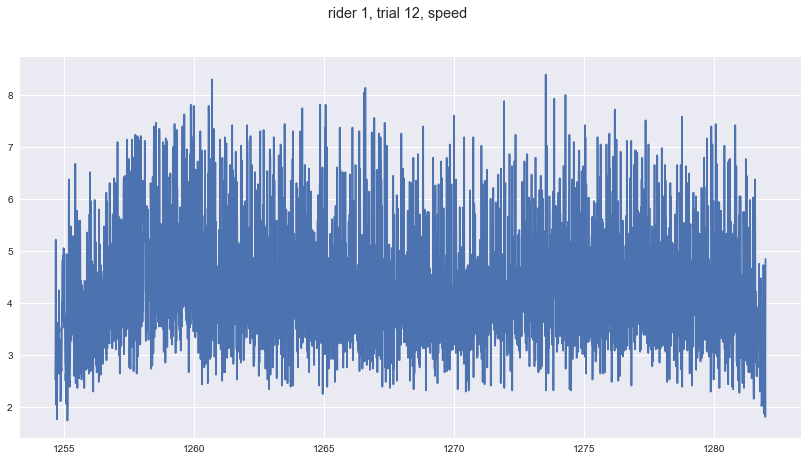

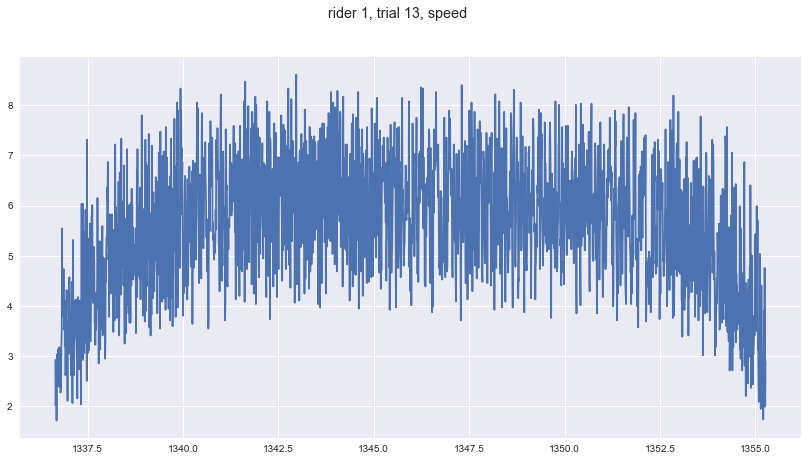

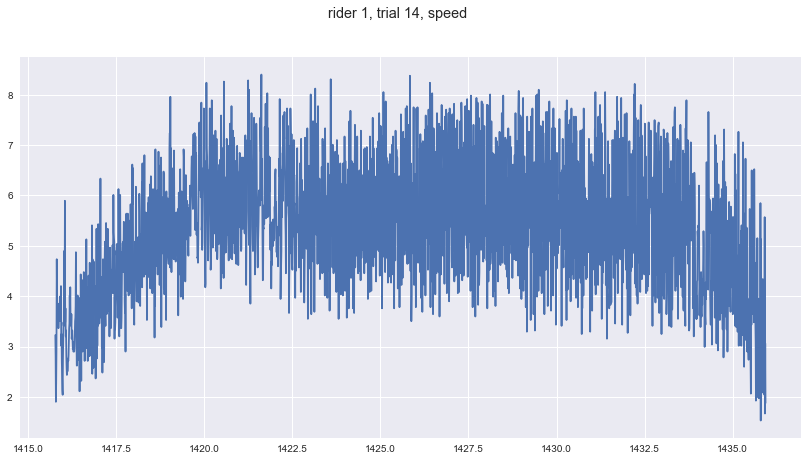

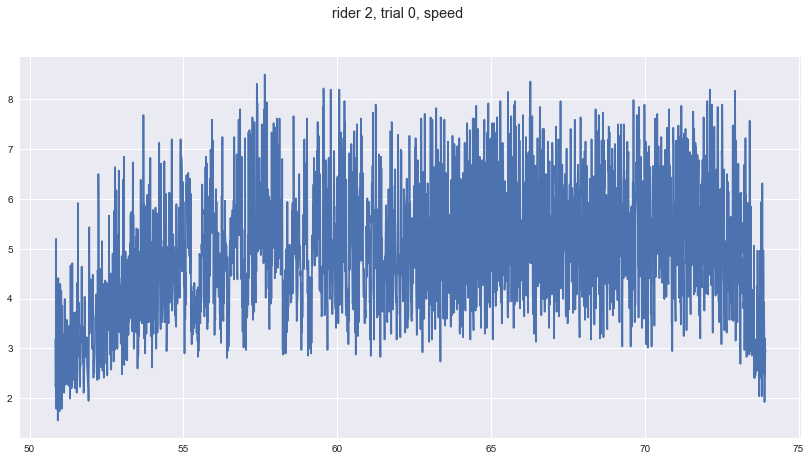

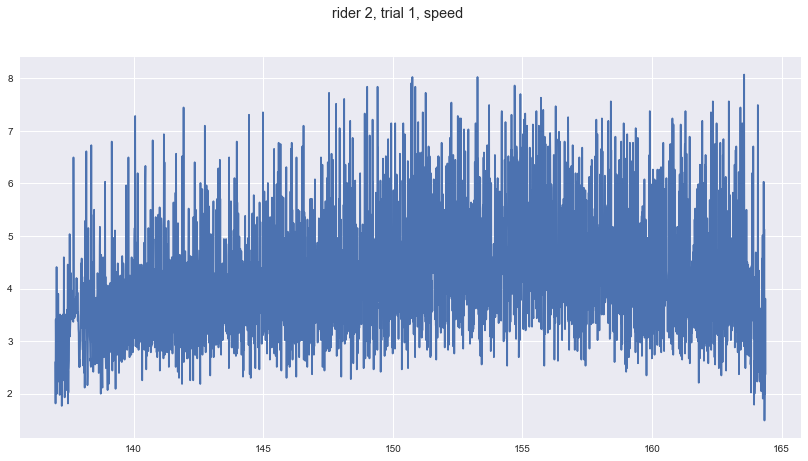

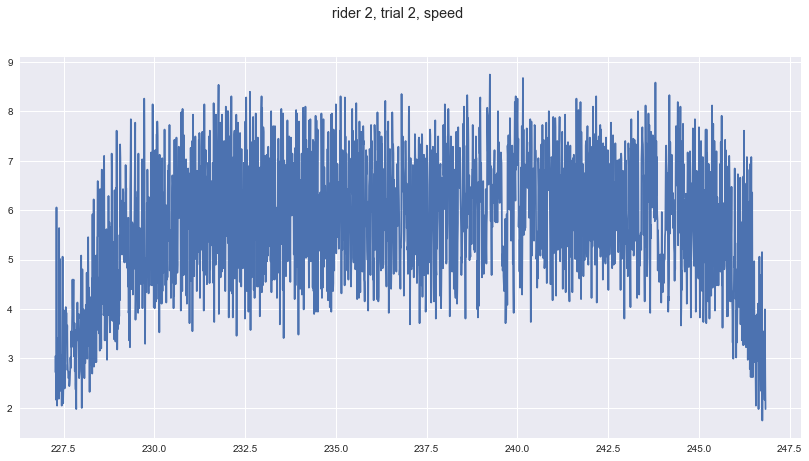

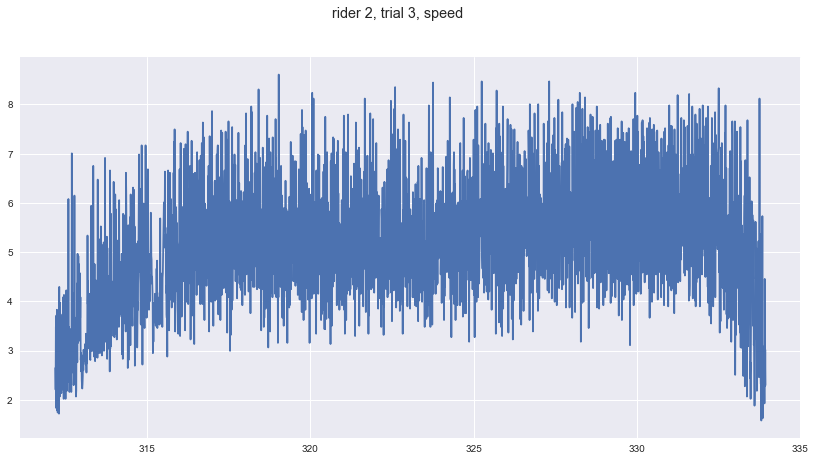

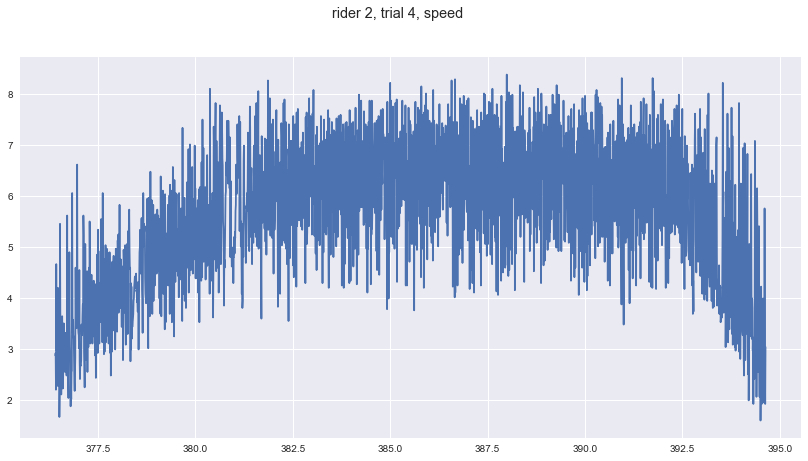

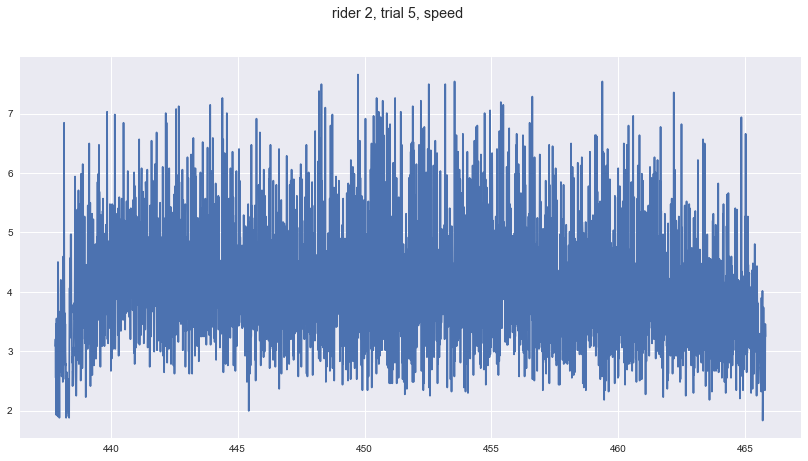

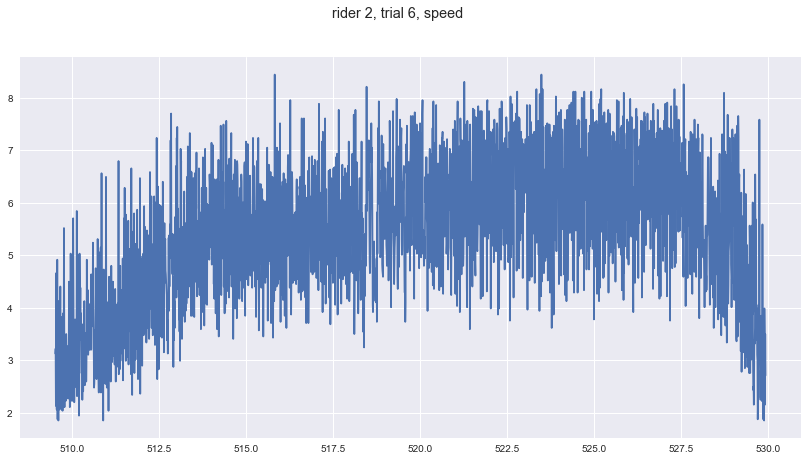

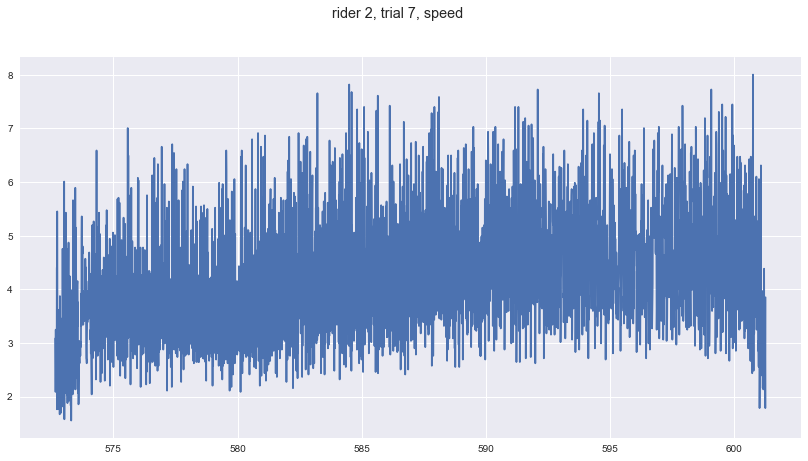

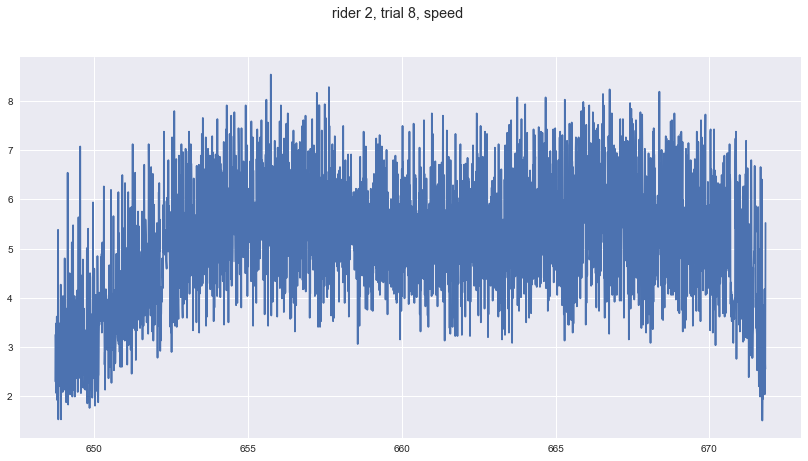

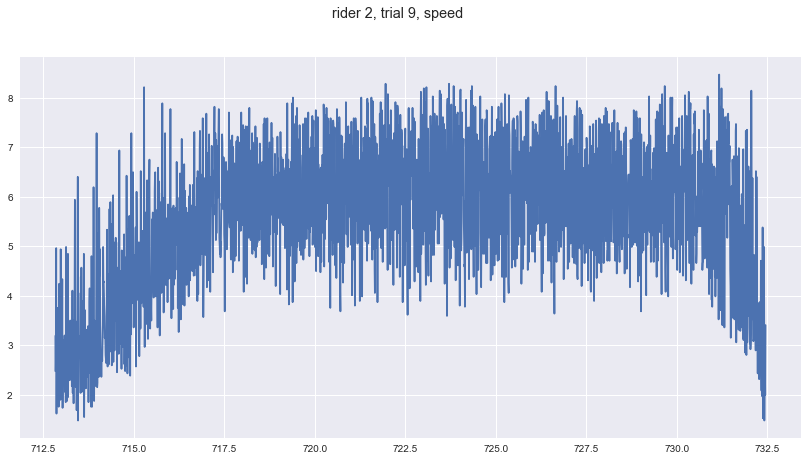

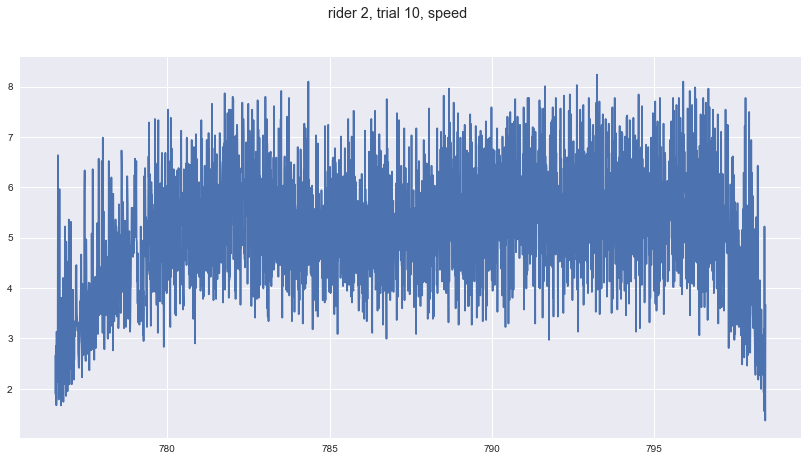

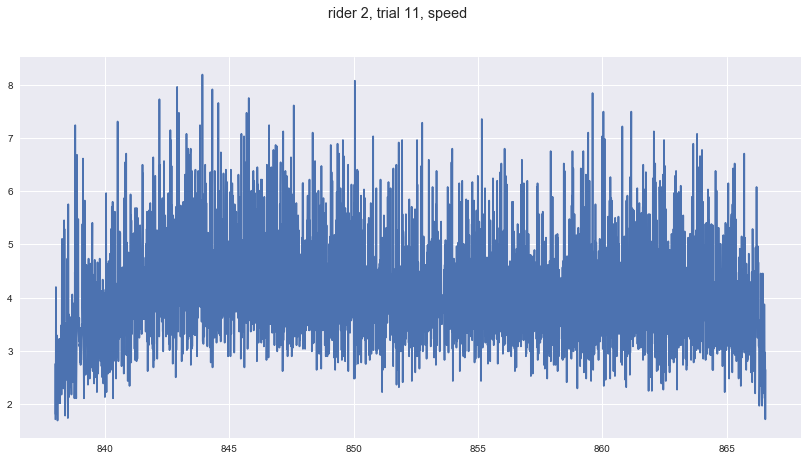

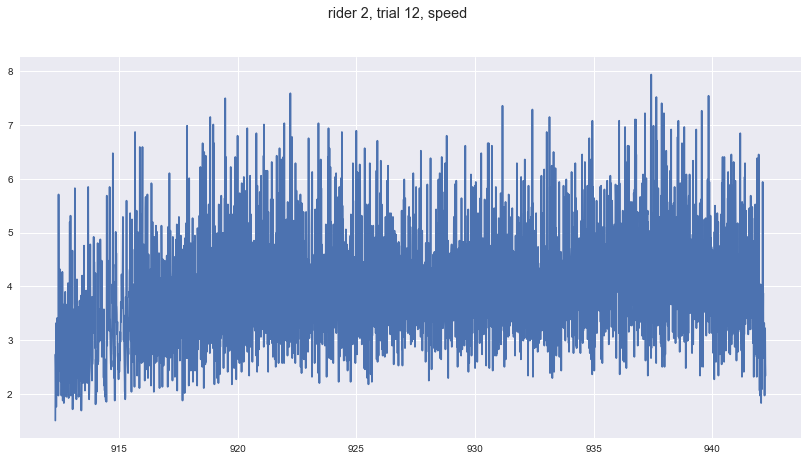

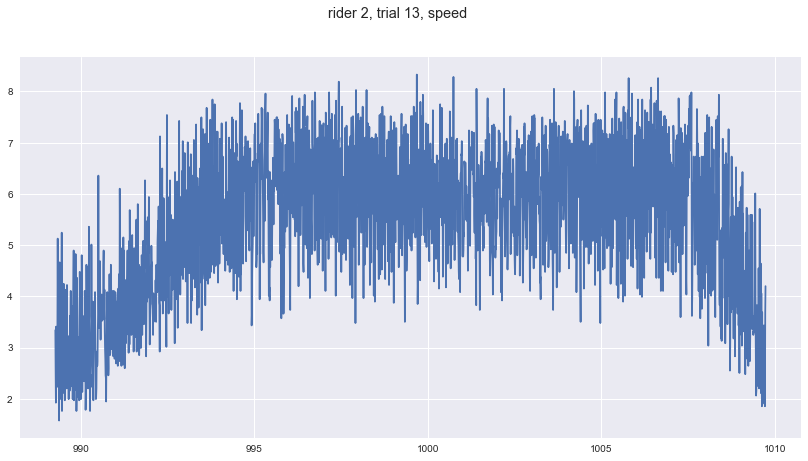

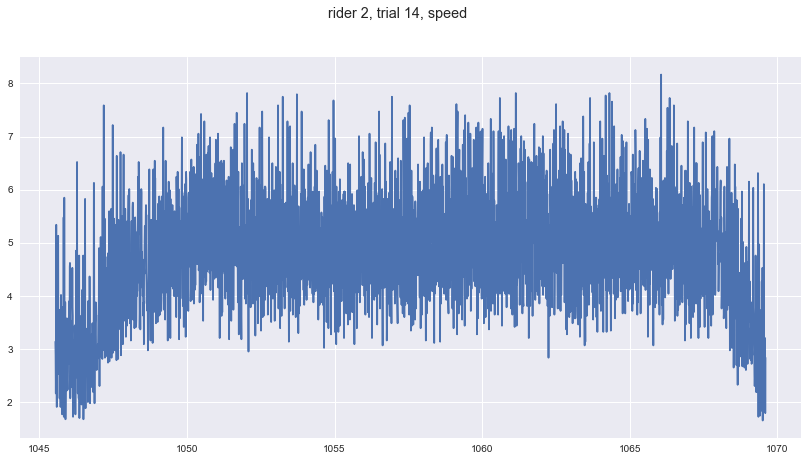

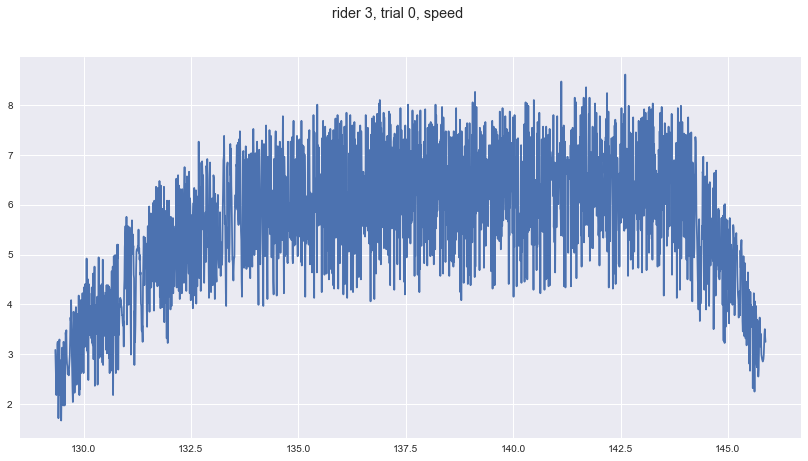

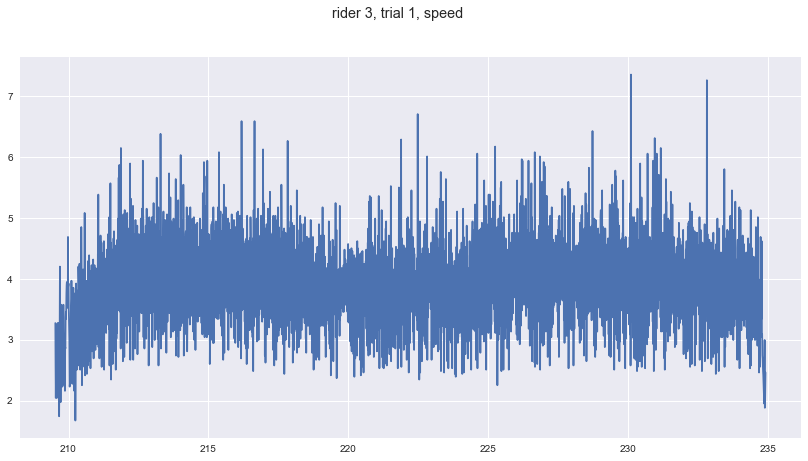

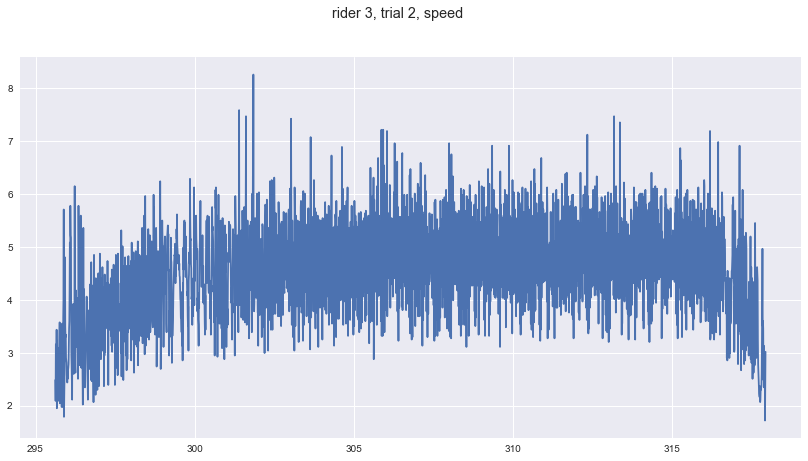

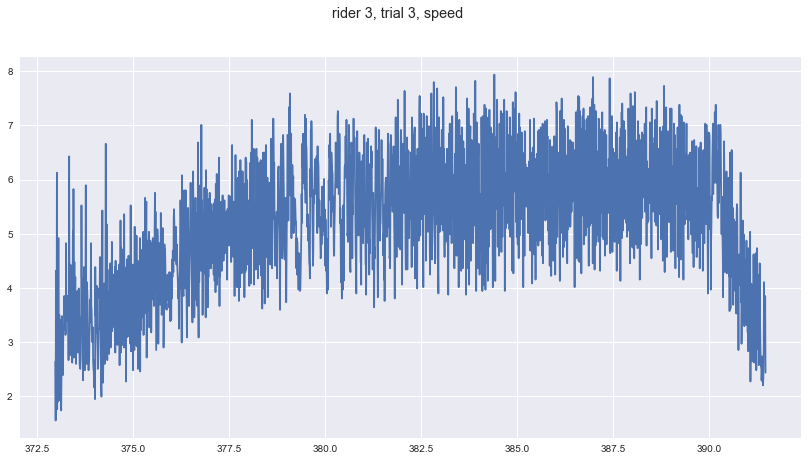

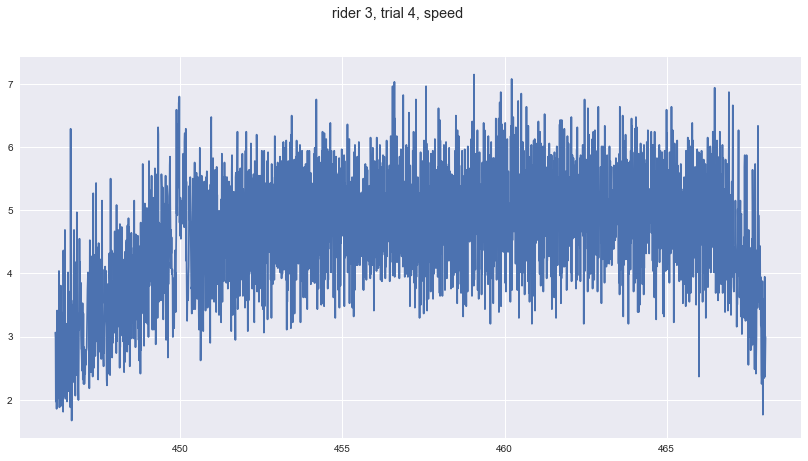

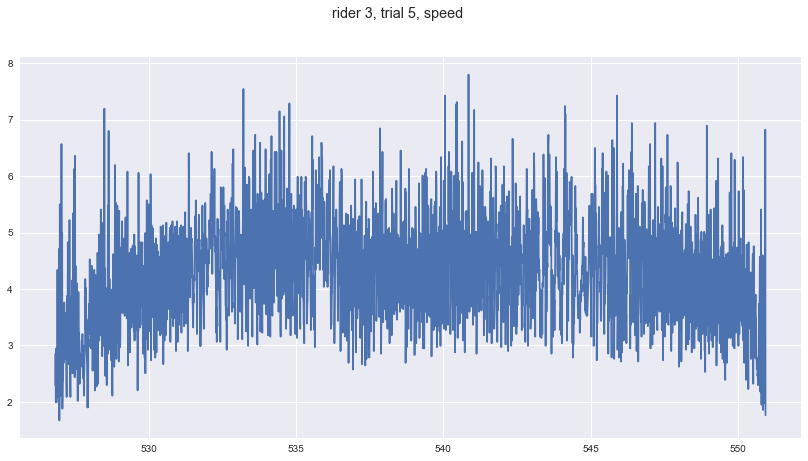

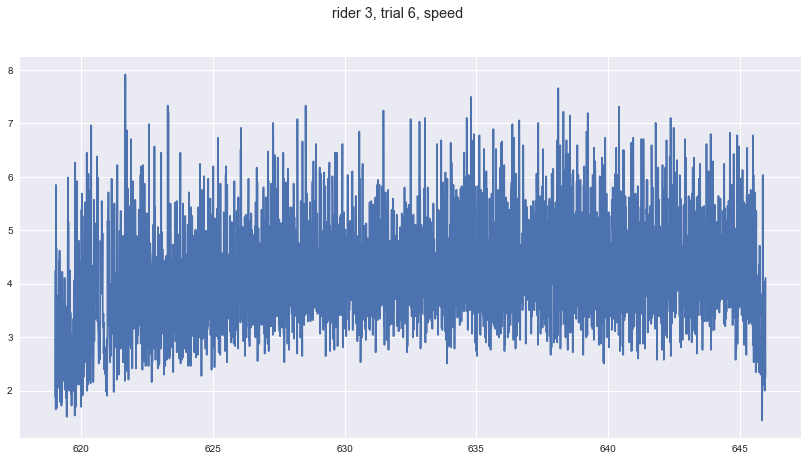

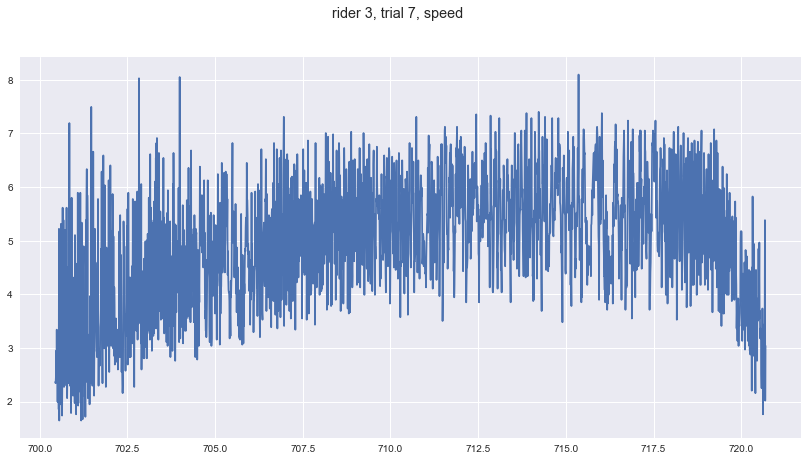

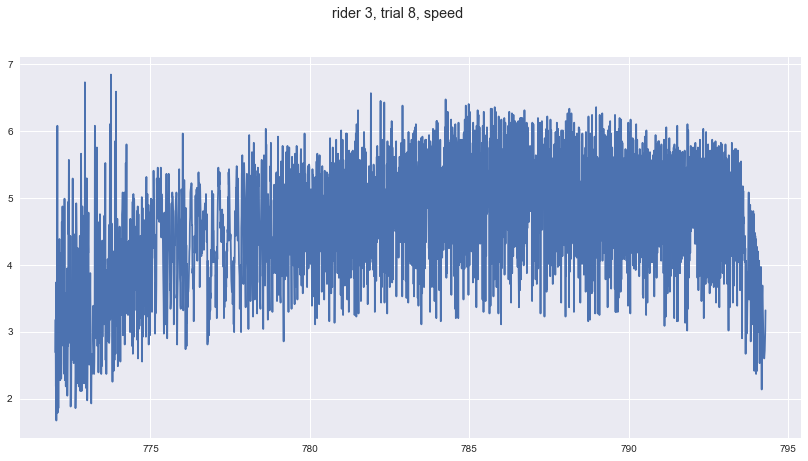

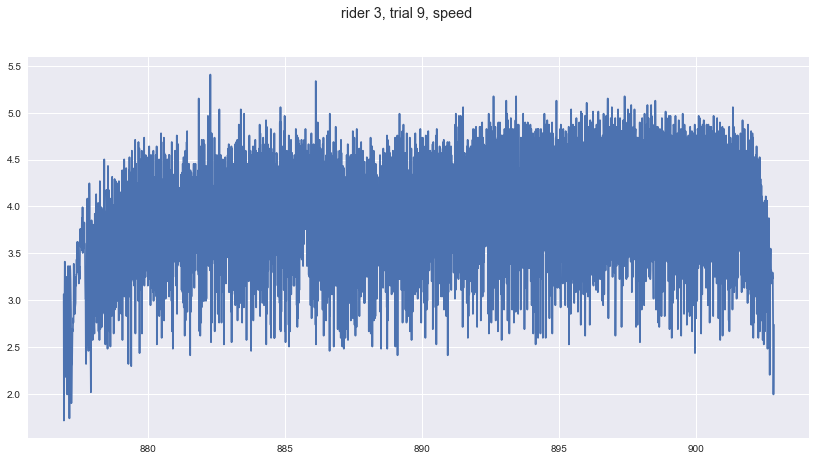

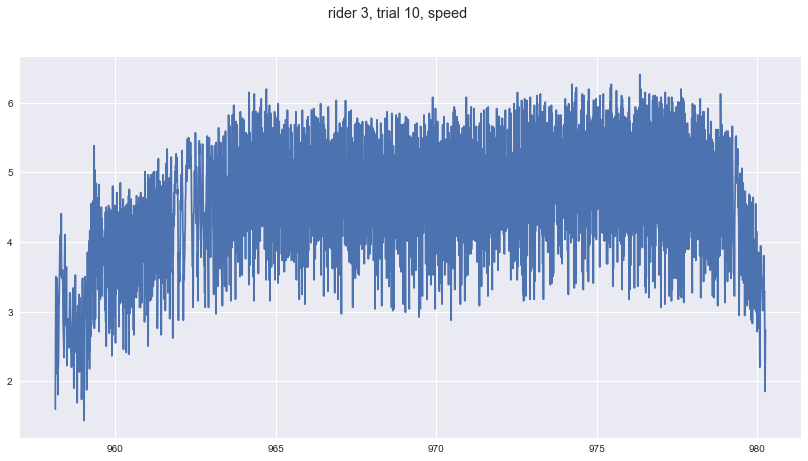

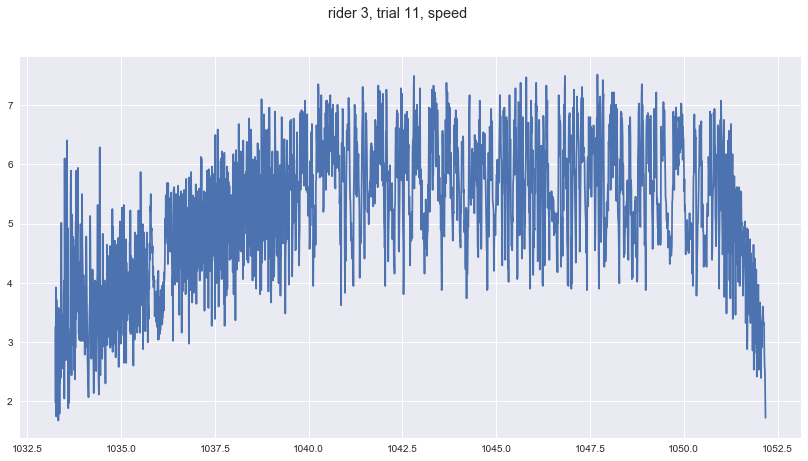

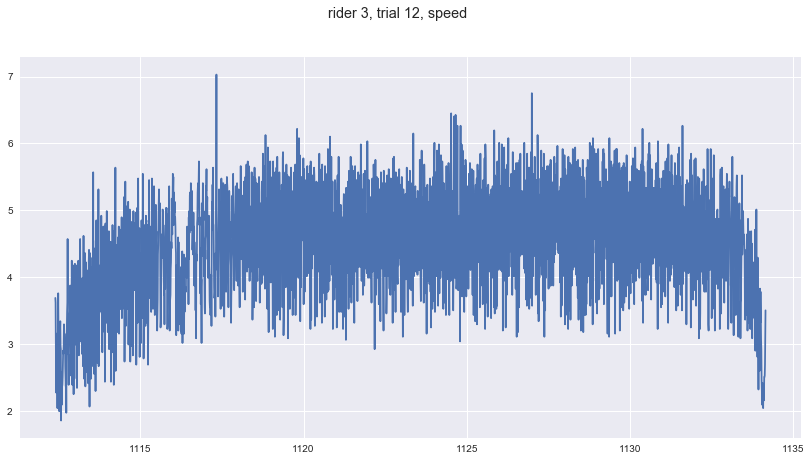

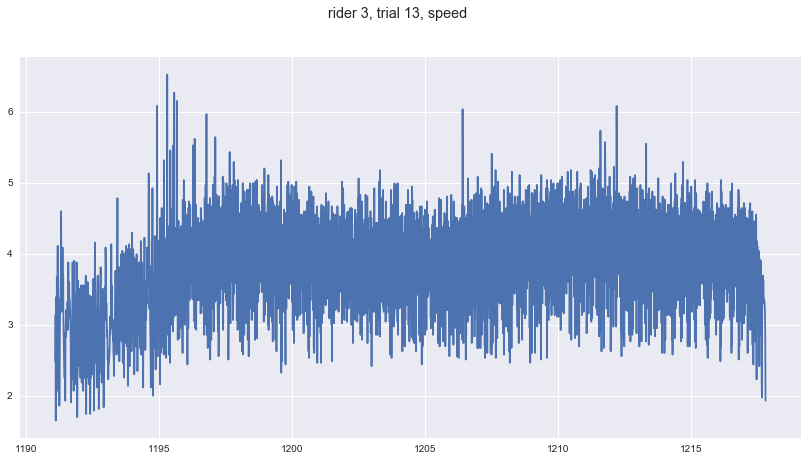

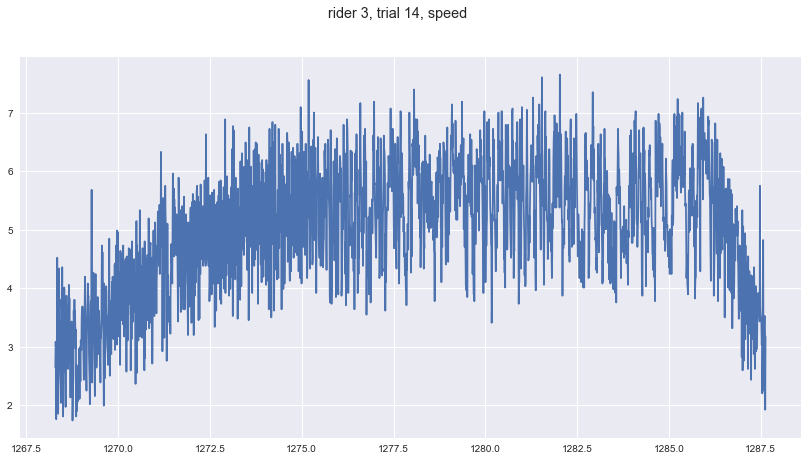

In [13]:
plt.close()
for rid in range(4):
    r = records[rid]
    for tid, trial in enumerate(r.trial):
        fig, ax = plt.subplots(figsize=DEFAULT_FIGSIZE)
        ax.plot(trial.data.time, trial.data.speed)
        set_title(ax, 'rider {}, trial {}, speed'.format(rid, tid))
plt.show()

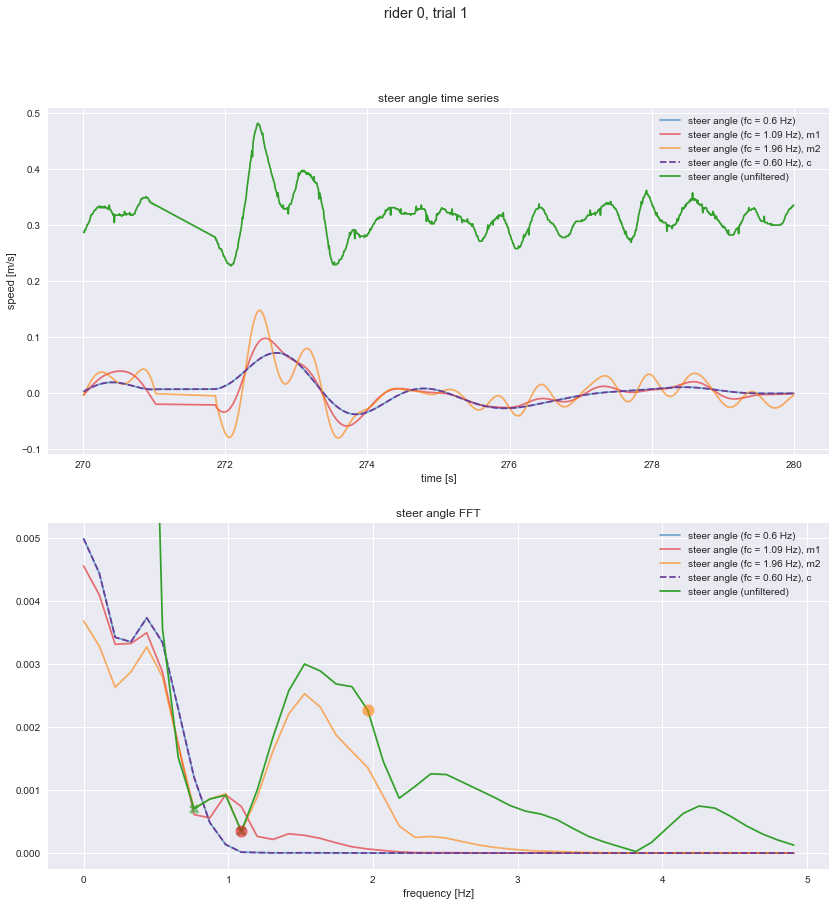

In [20]:
import numpy as np
import itertools

# rider, trial, average speed, cutoff, freq1, freq2
data = np.zeros((4*15, 6))

plt.close()
for rid, tid in itertools.product(range(0, 1), range(1, 2)):
    r = records[rid]
    trial = r.trial[tid]
    ax, cutoff, freq1, freq2 = trial.plot_steer_angle_filter_calculation(
        figsize=(DEFAULT_FIGSIZE[0], 2*DEFAULT_FIGSIZE[1]))
    ax[0].set_title('steer angle time series')
    set_title(ax[0], 'rider {}, trial {}'.format(rid, tid))

    data[rid*15 + tid, :] = np.array([
        rid, tid, trial.data.speed.mean(), cutoff, freq1, freq2])
plt.show()

In [12]:
import pandas as pd
import seaborn as sns

# Average speed (v) in this dataframe is over the entire trial
df = pd.DataFrame(data=data, columns=['rider', 'trial', 'v', 'cutoff', 'freq1', 'freq2'])

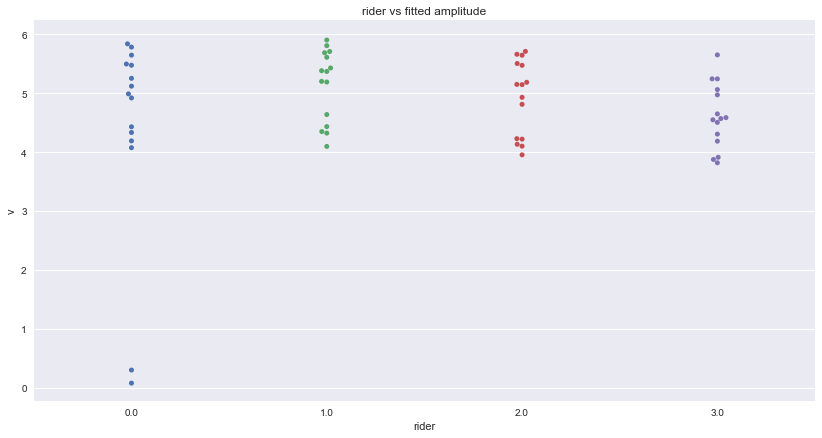

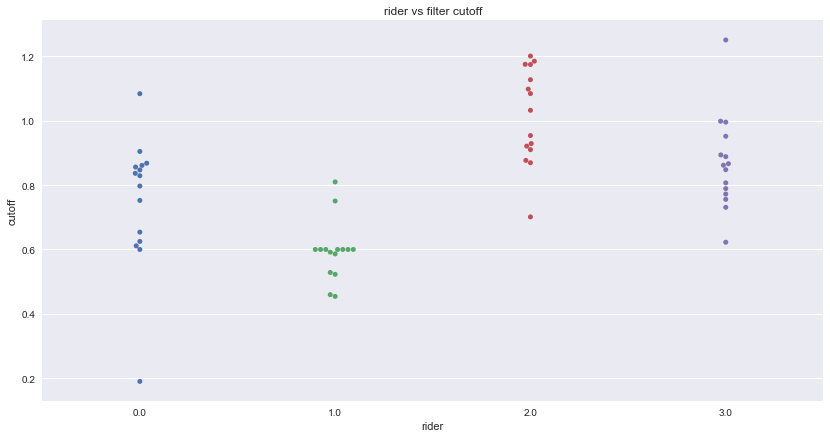

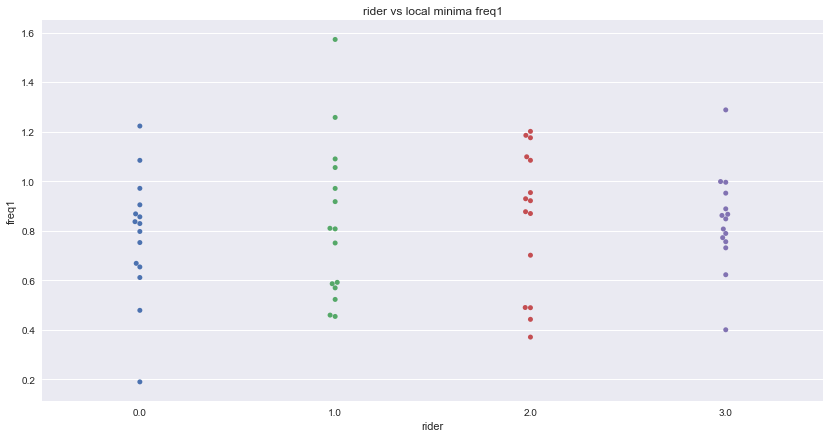

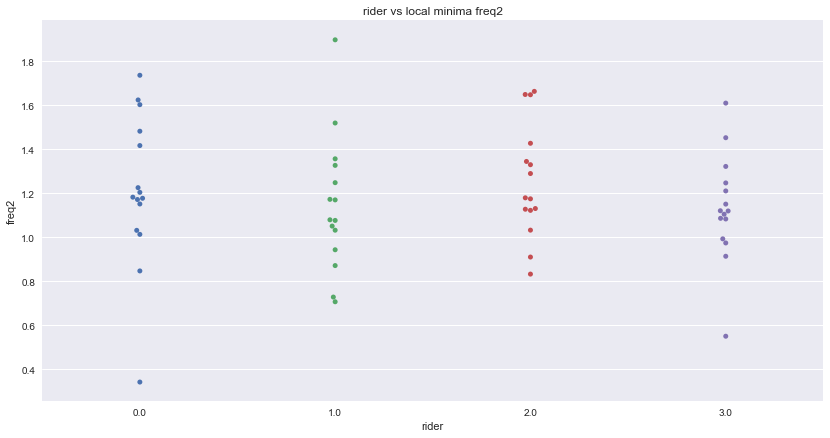

In [13]:
fig, ax = plt.subplots(figsize=DEFAULT_FIGSIZE)
sns.swarmplot(x='rider', y='v', data=df, ax=ax)
ax.set_title('rider vs fitted amplitude')

fig, ax = plt.subplots(figsize=DEFAULT_FIGSIZE)
sns.swarmplot(x='rider', y='cutoff', data=df, ax=ax)
ax.set_title('rider vs filter cutoff')

fig, ax = plt.subplots(figsize=DEFAULT_FIGSIZE)
sns.swarmplot(x='rider', y='freq1', data=df, ax=ax)
ax.set_title('rider vs local minima freq1')
plt.show()

fig, ax = plt.subplots(figsize=DEFAULT_FIGSIZE)
sns.swarmplot(x='rider', y='freq2', data=df, ax=ax)
ax.set_title('rider vs local minima freq2')
plt.show()

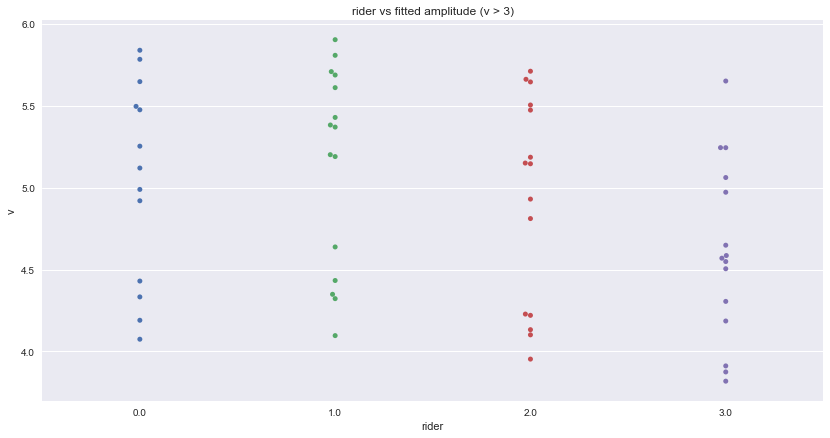

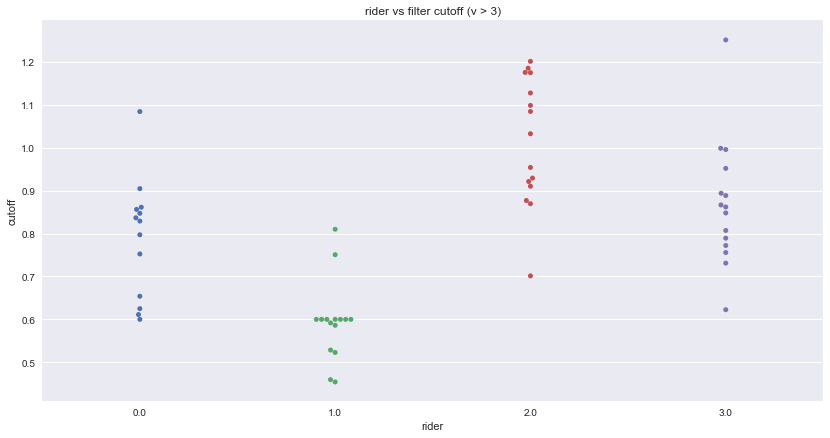

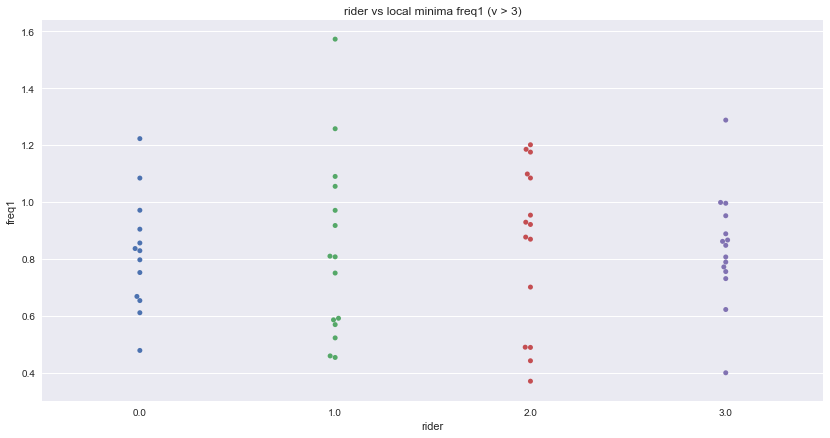

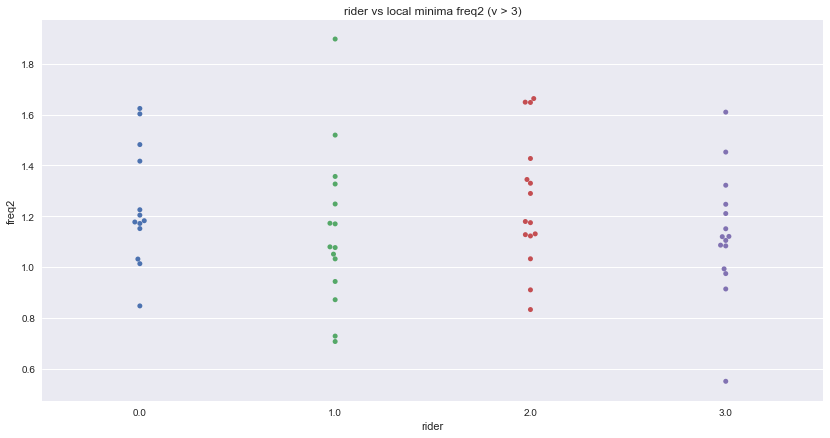

In [17]:
fig, ax = plt.subplots(figsize=DEFAULT_FIGSIZE)
sns.swarmplot(x='rider', y='v', data=df[df.v > 3], ax=ax)
ax.set_title('rider vs fitted amplitude (v > 3)')

fig, ax = plt.subplots(figsize=DEFAULT_FIGSIZE)
sns.swarmplot(x='rider', y='cutoff', data=df[df.v > 3], ax=ax)
ax.set_title('rider vs filter cutoff (v > 3)')

fig, ax = plt.subplots(figsize=DEFAULT_FIGSIZE)
sns.swarmplot(x='rider', y='freq1', data=df[df.v > 3], ax=ax)
ax.set_title('rider vs local minima freq1 (v > 3)')
plt.show()

fig, ax = plt.subplots(figsize=DEFAULT_FIGSIZE)
sns.swarmplot(x='rider', y='freq2', data=df[df.v > 3], ax=ax)
ax.set_title('rider vs local minima freq2 (v > 3)')
plt.show()

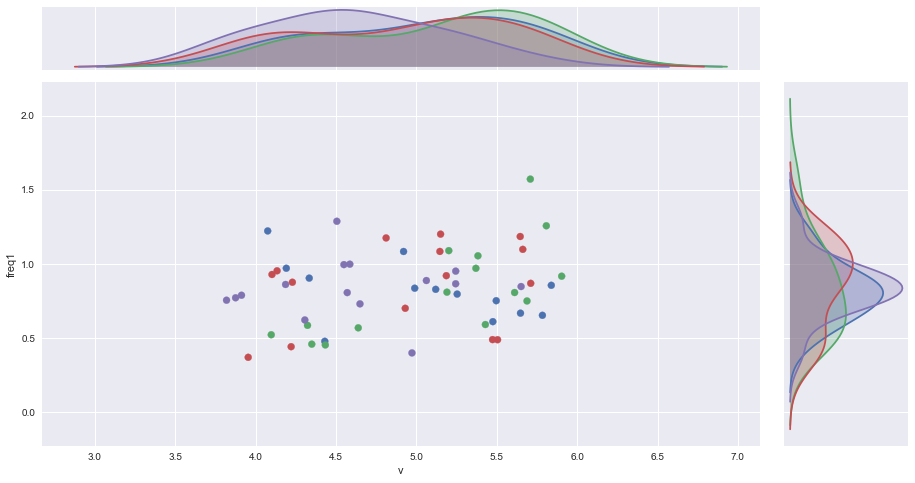

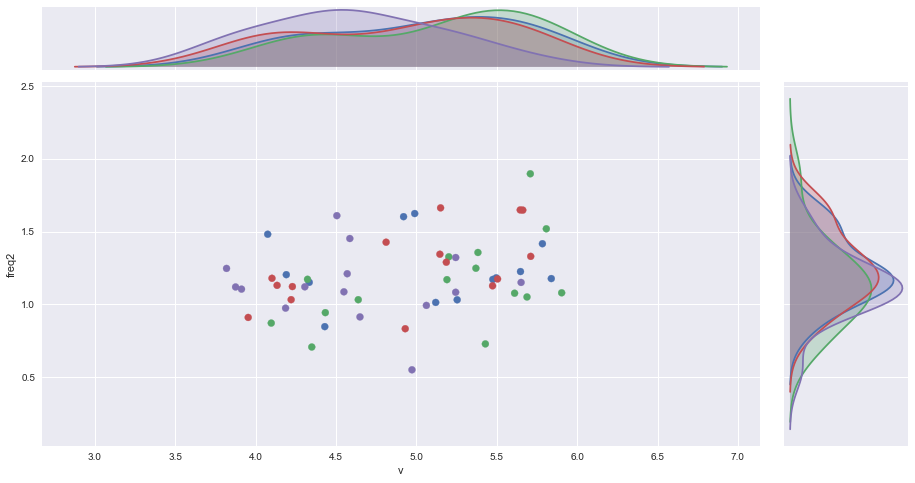

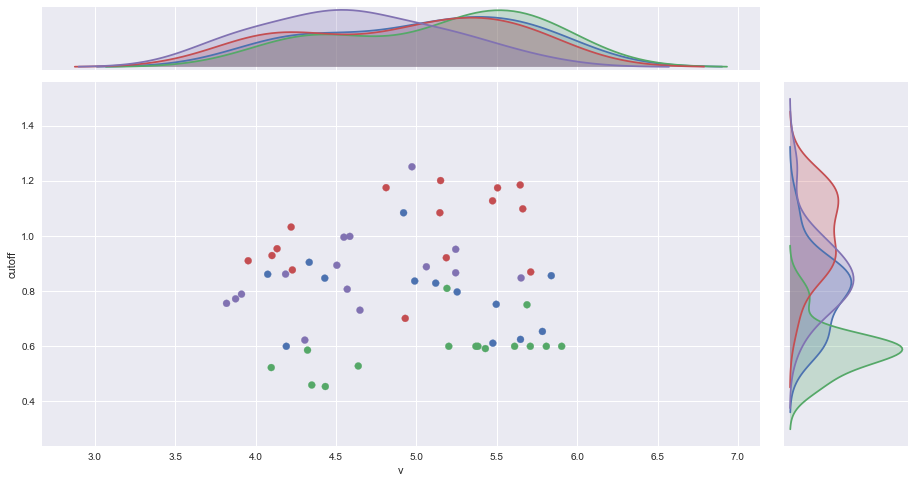

In [27]:
from antlia.plotdf import colormap, plotjoint
colors = sns.color_palette()

plt.close()
g = plotjoint('v', 'freq1', df[df.v > 3], ('rider', colors))
g.fig.set_size_inches(DEFAULT_FIGSIZE)
g = plotjoint('v', 'freq2', df[df.v > 3], ('rider', colors))
g.fig.set_size_inches(DEFAULT_FIGSIZE)
g = plotjoint('v', 'cutoff', df[df.v > 3], ('rider', colors))
g.fig.set_size_inches(DEFAULT_FIGSIZE)
plt.show()